# **Similarity, Clustering and Anomaly Detection**

## _Machine Learning Modelling Workflow Notebook 7_

## Content:
1. Splitting the dataframe into train and test subsets;
2. Obtaining the distance matrix to find similarities;
3. Applying the K-Means Elbow method to find ideal number of clusters;
4. K-Means Clustering;
5. Anomaly detection.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

## **Load Python Libraries in Global Context**

In [1]:
import load
from idsw import *

/content/idsw/datafetch/core.py:1713: SyntaxWarning: invalid escape sequence '\p'
  engine = create_engine(r"sqlite:///C:\path\to\foo.db")
/content/idsw/datafetch/pipes.py:317: SyntaxWarning: invalid escape sequence '\s'
  txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
/content/idsw/datafetch/pipes.py:1271: SyntaxWarning: invalid escape sequence '\('
  To find a spec like "TensorSpec(shape=(None, *, *)" the Regex would be: r"TensorSpec\(shape=\(None, (\d+), (\d+)\)"
/content/idsw/modelling/core.py:2751: SyntaxWarning: invalid escape sequence '\{'
  * Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each
/content/idsw/modelling/core.py:2846: SyntaxWarning: invalid escape sequence '\{'
  $\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$,


Package copied to the working directory.
To import its whole content, run:

    from idsw import *



/content/idsw/modelling/deep.py:239: SyntaxWarning: invalid escape sequence '\%'
  print("In this example, we added Dropout(0.5). It means that you lose 50\% of nodes. If using Dropout(0.2), you would lose 20\% of nodes.")
/content/idsw/modelling/deep.py:445: SyntaxWarning: invalid escape sequence '\%'
  print("In this example, we added Dropout(0.5). It means that you lose 50\% of nodes. If using Dropout(0.2), you would lose 20\% of nodes.")
/content/idsw/etl/core.py:2462: SyntaxWarning: invalid escape sequence '\d'
  r'st\d\s\w{3,10}'
/content/idsw/etl/core.py:2583: SyntaxWarning: invalid escape sequence '\d'
  - re.findall(r"\d+-\d+", text) - returns: ['4-3', '10-04']
/content/idsw/etl/core.py:2632: SyntaxWarning: invalid escape sequence '\s'
  - If we do re.findall(r"the\s\d+s", my_string) - returns: ['the 80s', 'the 90s']
/content/idsw/etl/core.py:2720: SyntaxWarning: invalid escape sequence '\d'
  - Example: re.match(r"\d+", "12345bcada") - returns: <_sre.SRE_Match object; span=(0

## **Call the functions**

### **Importing the dataset**

In [3]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt),
## JSON, txt, or CSV (comma separated values) files. Tables in webpages or html files can also be read.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset2.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or,
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.
# Also, html files and webpages may be also read.

# You may input the path for an HTML file containing a table to be read; or
# a string containing the address for a webpage containing the table. The address must start
# with www or htpp. If a website is input, the full address can be input as FILE_DIRECTORY_PATH
# or as FILE_NAME_WITH_EXTENSION.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True
# if you want to read a file with txt extension containing a text formatted as JSON
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’,
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’,
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}


HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = ","
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " "
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.

SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep.
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Dataset extracted from dataset2.csv. Check the 10 first rows of this dataframe:



,timestamp,Season,Repetition,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,...,Cultivar_SUZY IPRO_OneHotEnc,Cultivar_SYN2282IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc,PH_log,IFP_log,NLP_log,NGL_log,NS_log,MHG_log,GY_log
0,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.074142,2.721295,4.587006,0.593327,1.648659,5.025195,8.081110
1,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.396915,2.890372,4.593098,0.559616,2.001480,4.980794,8.080544
2,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,3.955082,2.667228,4.171306,0.832909,1.974081,5.194345,8.199865
3,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,3.988984,2.734368,4.409155,0.982078,2.104134,5.237877,8.324278
4,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.010963,2.985682,3.891820,0.494696,1.280934,5.081466,8.141289
5,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.104295,2.760010,4.117410,0.797507,1.791759,5.100659,8.140525
6,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.265493,2.965273,4.290459,0.717840,1.856298,5.177448,8.162262
7,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,3.985273,2.639057,3.891820,0.978326,1.648659,5.120028,7.988859
8,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.461300,3.135494,3.784190,0.693147,1.568616,5.235750,8.382154
9,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.021774,2.610070,3.793239,0.688135,1.029619,5.279491,8.220513


In [4]:
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'f1_sin', 'f1_cos', 'f2_sin',
       'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
       'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos',
       'Cultivar_74K75RSF CE_OneHotEnc',
       'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc',
       'Cultivar_79I81RSF IPRO_OneHotEnc',
       'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_98R30 CE_OneHotEnc',
       'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc',
       'Cultivar_ATAQUE I2X_OneHotEnc',
       'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_ELISA IPRO_OneHotEnc',
       'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_OneHotEnc',
       'Cultivar_FORTALEZA IPRO_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneH

### **Separating and preparing features and responses tensors**

In [5]:
DATASET = dataset  #Alternatively: object containing the dataset to be analyzed

FEATURES_COLUMNS = ['PH_log', 'IFP_log', 'NLP_log', 'NGL_log', 'NS_log', 'MHG_log']
# FEATURES_COLUMNS: list of strings or string containing the names of columns
# with predictive variables in the original dataframe.
# Example: FEATURES_COLUMNS = ['col1', 'col2']; FEATURES_COLUMNS = 'predictor';
# FEATURES_COLUMNS = ['predictor'].

RESPONSE_COLUMNS = 'GY_log'
# RESPONSE_COLUMNS: list of strings or string containing the names of columns
# with response variables in the original dataframe.
# Example: RESPONSE_COLUMNS= ['col3', 'col4']; RESPONSE_COLUMNS = 'response';
# RESPONSE_COLUMNS = ['response']

# Arrays or tensors containing features and responses returned as X and y, respectively.
# Mapping dictionary correlating the position in array or tensor to the original column name
# returned as column_map_dict.
# Simply modify these objects on the left of equality:
X, y, column_map_dict = separate_and_prepare_features_and_responses (df = DATASET, features_columns = FEATURES_COLUMNS, response_columns = RESPONSE_COLUMNS)

Check the 5 first elements from the tensors or arrays obtained:

Features tensor or array:

tf.Tensor(
[[4.07414185 2.72129543 4.58700622 0.59332685 1.64865863 5.02519545]
 [4.39691525 2.89037176 4.5930976  0.55961579 2.00148    4.98079445]
 [3.95508249 2.66722821 4.1713056  0.83290912 1.97408103 5.19434478]
 [3.98898405 2.73436751 4.4091553  0.98207847 2.10413415 5.2378771 ]
 [4.01096295 2.98568194 3.8918203  0.49469624 1.28093385 5.08146647]], shape=(5, 6), dtype=float64)


Shape of the complete X tensor or array = (320, 6)

Responses tensor or array:

tf.Tensor(
[[8.0811101 ]
 [8.08054387]
 [8.19986533]
 [8.32427812]
 [8.14128883]], shape=(5, 1), dtype=float64)


Shape of the complete y tensor or array = (320, 1)

The mapping of the arrays' positions with the columns original names was returned as 'column_map_dict'.


### **Splitting features and responses into train and test tensors**

In [6]:
X_tensor = X
# X_tensor = tensor or array of predictive variables. Alternatively, modify X, not X_tensor.
Y_tensor = y
# Y_tensor = tensor or array of response variables. Alternatively, modify y, not Y_tensor.

PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING = 100
# percent_of_data_used_for_model_training: float from 0 to 100,
# representing the percent of data used for training the model

PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION = 0
# If you want to use cross-validation, separate a percent of the training data for validation.
# Declare this percent as PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION (float from 0 to 100).

# Subset and series destined to training, testing and/or validation returned in the dictionary split_dictionary;
# Simply modify this object on the left of equality:
split_dictionary = split_data_into_train_and_test (X = X_tensor, y = Y_tensor, percent_of_data_used_for_model_training = PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING, percent_of_training_data_used_for_model_validation = PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION)

X and y successfully splitted into train: X_train, y_train (100.0% of data); test: X_test, y_test (0.0% of data); and validation subsets: X_valid, y_valid (0.0% of data).


10 first rows from subset X_train:

[[4.07414185 2.72129543 4.58700622 0.59332685 1.64865863 5.02519545]
 [4.39691525 2.89037176 4.5930976  0.55961579 2.00148    4.98079445]
 [3.95508249 2.66722821 4.1713056  0.83290912 1.97408103 5.19434478]
 [3.98898405 2.73436751 4.4091553  0.98207847 2.10413415 5.2378771 ]
 [4.01096295 2.98568194 3.8918203  0.49469624 1.28093385 5.08146647]
 [4.10429489 2.76000994 4.11740984 0.7975072  1.79175947 5.1006588 ]
 [4.26549282 2.96527307 4.29045944 0.71783979 1.85629799 5.17744832]
 [3.98527347 2.63905733 3.8918203  0.97832612 1.64865863 5.12002767]
 [4.46129982 3.13549422 3.78418963 0.69314718 1.56861592 5.23575023]
 [4.02177387 2.61006979 3.79323947 0.68813464 1.02961942 5.27949126]]


10 first rows from subset y_train:

[[8.0811101 ]
 [8.08054387]
 [8.19986533]
 [8.32427812]
 [8.14

### **Applying the K-Means Elbow method to find ideal number of clusters**
- Support for K-Means Clustering Algorithm

A saída de streaming foi truncada nas últimas 5000 linhas.
Initialization complete
Iteration 0, inertia 8.912225014303257.
Iteration 1, inertia 6.923820467241136.
Iteration 2, inertia 6.721909354853631.
Iteration 3, inertia 6.672493480844514.
Iteration 4, inertia 6.660727817751445.
Iteration 5, inertia 6.634682289963308.
Iteration 6, inertia 6.625982511733823.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 9.009970643661548.
Iteration 1, inertia 6.729998222802859.
Iteration 2, inertia 6.637182881295013.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 8.937288452957775.
Iteration 1, inertia 6.577471980126386.
Iteration 2, inertia 6.47354822863072.
Iteration 3, inertia 6.46143726114232.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 8.846744833446289.
Iteration 1, inertia 6.448930416188233.
Iteration 2, inertia 6.271486957959166.
Iteration 3, inertia 6.250898

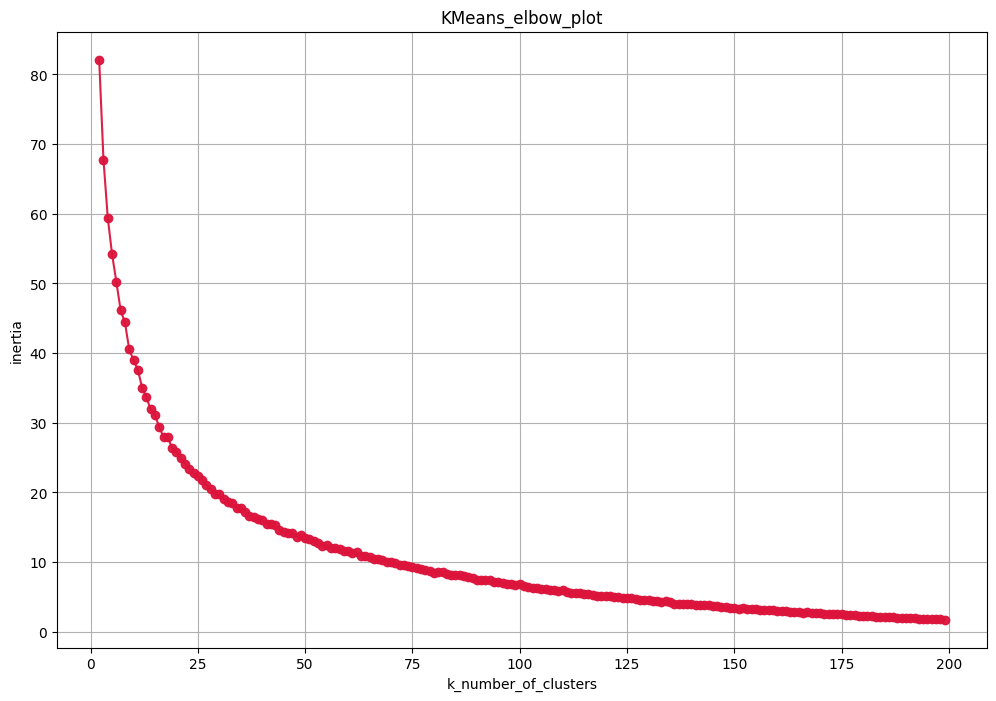



Check the summary dataframe with the number of clusters and correspondent inertia:



,k_number_of_clusters,inertia
0,2,82.128993
1,3,67.788925
2,4,59.423860
3,5,54.208771
4,6,50.253033
...,...,...
193,195,1.884906
194,196,1.812680
195,197,1.846863
196,198,1.803690


In [7]:
X_TENSOR = X
# X_TENSOR = subset of predictive variables (dataframe). Since this is a non-supervised algorithm,
# you may pass the full dataset.

MAX_NUMBER_OF_CLUSTERS_TO_TEST = 200
# MAX_NUMBER_OF_CLUSTERS_TO_TEST = 100 (integer). The algorithm will test 2 to the total of clusters you defined as
# MAX_NUMBER_OF_CLUSTERS_TO_TEST.
NUMBER_OF_INITIALIZATIONS = 10
# NUMBER_OF_INITIALIZATIONS = 10 (integer). Number of times the k-means algorithm is run with
# different centroid seeds. The final results is the best output of n_init consecutive runs in terms
# of inertia. Several runs are recommended for sparse high-dimensional problems.
# Manipulates the parameter n_init from KMeans Sklearn class.
MAXIMUM_OF_ALLOWED_ITERATIONS = 20000
# MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
# that the optimization algorithm can perform. Depending on data, convergence may not be
# reached within this limit, so you may need to increase this hyperparameter.
KMEANS_ALGORITHM = 'lloyd'
# KMEANS_ALGORITHM = 'lloyd'. K-means algorithm to use. The classical EM-style algorithm is "lloyd".
# The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using
# the triangle inequality. However it’s more memory intensive due to the allocation of an extra
# array of shape (n_samples, n_clusters).
# Options: “lloyd”, “elkan”, “auto”, “full”. Manipulates the parameter algorithm from KMeans
# Sklearn class.
TOLERANCE = 0.0001
# TOLERANCE = 0.0001. Relative tolerance with regards to Frobenius norm of the difference in the
# cluster centers of two consecutive iterations to declare convergence.
# Manipulates the parameter tol from KMeans Sklearn class.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'KMeans_elbow_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# The dataframe containing the number of cluster and correspondent inertia was returned as
# elbow_df. Simply modify this object on the left of equality:
elbow_df = kmeans_elbow_method (X_tensor = X_TENSOR, max_number_of_clusters_to_test = MAX_NUMBER_OF_CLUSTERS_TO_TEST, number_of_initializations = NUMBER_OF_INITIALIZATIONS, maximum_of_allowed_iterations = MAXIMUM_OF_ALLOWED_ITERATIONS, kmeans_algorithm = KMEANS_ALGORITHM, tolerance = TOLERANCE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# Elbow about 60 clusters

### **K-Means Clustering**
- Unsupervised learning method for assigning clusters to each data point.
- Notice that the response predicted by the model is simply the cluster for a given entry.

In [8]:
X_TENSOR = X
# X_TENSOR = subset of predictive variables (dataframe). Since this is a non-supervised algorithm,
# you may pass the full dataset.

NUMBER_OF_CLUSTERS = 60
# NUMBER_OF_CLUSTERS = 8 (integer). The number of clusters to form as well as the number of centroids
# to generate. Manipulates the parameter n_clusters from KMeans Sklearn class.
NUMBER_OF_INITIALIZATIONS = 10
# NUMBER_OF_INITIALIZATIONS = 10 (integer). Number of times the k-means algorithm is run with
# different centroid seeds. The final results is the best output of n_init consecutive runs in terms
# of inertia. Several runs are recommended for sparse high-dimensional problems.
# Manipulates the parameter n_init from KMeans Sklearn class.
MAXIMUM_OF_ALLOWED_ITERATIONS = 20000
# MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
# that the optimization algorithm can perform. Depending on data, convergence may not be
# reached within this limit, so you may need to increase this hyperparameter.
KMEANS_ALGORITHM = 'lloyd'
# KMEANS_ALGORITHM = 'lloyd'. K-means algorithm to use. The classical EM-style algorithm is "lloyd".
# The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using
# the triangle inequality. However it’s more memory intensive due to the allocation of an extra
# array of shape (n_samples, n_clusters).
# Options: “lloyd”, “elkan”, “auto”, “full”. Manipulates the parameter algorithm from KMeans
# Sklearn class.
TOLERANCE = 0.0001
# TOLERANCE = 0.0001. Relative tolerance with regards to Frobenius norm of the difference in the
# cluster centers of two consecutive iterations to declare convergence.
# Manipulates the parameter tol from KMeans Sklearn class.


# The model object that may be used for predicting the clusters for new data was
# returned as kmeans_model. The labels (clusters) correspondent to each entry in the input tensor
# were returned as X_labels, and the model's centroids were returned as centroids.
# Simply modify these objects on the left of equality:
kmeans_model, X_labels, centroids = kmeans_clustering (X_tensor = X_TENSOR, number_of_clusters = NUMBER_OF_CLUSTERS, number_of_initializations = NUMBER_OF_INITIALIZATIONS, maximum_of_allowed_iterations = MAXIMUM_OF_ALLOWED_ITERATIONS, kmeans_algorithm = KMEANS_ALGORITHM, tolerance = TOLERANCE)

Initialization complete
Iteration 0, inertia 16.015187640345957.
Iteration 1, inertia 12.780487761296753.
Iteration 2, inertia 12.21772129370755.
Iteration 3, inertia 12.107979845960738.
Iteration 4, inertia 12.024755439808322.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 15.489609387815367.
Iteration 1, inertia 12.231850044678769.
Iteration 2, inertia 11.806801732575147.
Iteration 3, inertia 11.7613950086977.
Iteration 4, inertia 11.725767030791216.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 15.436667034718315.
Iteration 1, inertia 12.095304724308559.
Iteration 2, inertia 11.787780365723268.
Iteration 3, inertia 11.693782313396204.
Iteration 4, inertia 11.645787407304887.
Iteration 5, inertia 11.608372141834705.
Iteration 6, inertia 11.584901004993943.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 16.57120041250041.
Iteration 1, inertia 12.73431752

### **Making predictions with the models**

In [9]:
MODEL_OBJECT = kmeans_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = kmeans_model

X_tensor = X
# predict_for = 'subset' or predict_for = 'single_entry'
# The function will automatically detect if it is dealing with lists, NumPy arrays
# or Pandas dataframes. If X_df is a list or a single-dimension array, predict_for
# will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
# outputs for preparing data - even single_entry - for deep learning models), or if
# it is a Pandas dataframe, the function will set predict_for = 'subset'

# X_df = subset of predictive variables (dataframe, NumPy array, or list).
# If PREDICT_FOR = 'single_entry', X_df should be a list of parameters values.
# e.g. X_df = [1.2, 3, 4] (dot is the decimal case separator, comma separate values).
# Notice that the list should contain only the numeric values, in the same order of the
# correspondent columns.
# If PREDICT_FOR = 'subset' (prediction for multiple entries), X_df should be a dataframe
# (subset) or a multi-dimensional NumPy array of the parameters values, as usual.

DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset
# DATAFRAME_FOR_CONCATENATING_PREDICTIONS: if you want to concatenate the predictions
# to a dataframe, pass it here:
# e.g. DATAFRAME_FOR_CONCATENATING_PREDICTIONS = df
# If the dataframe must be the same one passed as X, repeat the dataframe object here:
# X_df = dataset, DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset.
# Alternatively, if DATAFRAME_FOR_CONCATENATING_PREDICTIONS = None,
# the prediction will be returned as a series or NumPy array, depending on the input format.
# Notice that the concatenated predictions will be added as a new column.

COLUMN_WITH_PREDICTIONS_SUFFIX = None
# COLUMN_WITH_PREDICTIONS_SUFFIX = None. If the predictions are added as a new column
# of the dataframe DATAFRAME_FOR_CONCATENATING_PREDICTIONS, you can declare this
# parameter as string with a suffix for identifying the model. If no suffix is added, the new
# column will be named 'y_pred'.
# e.g. COLUMN_WITH_PREDICTIONS_SUFFIX = '_keras' will create a column named "y_pred_keras". This
# parameter is useful when working with multiple models. Always start the suffix with underscore
# "_" so that no blank spaces are added; the suffix will not be merged to the column; and there
# will be no confusion with the dot (.) notation for methods, JSON attributes, etc.

FUNCTION_USED_FOR_FITTING_DL_MODEL = 'get_deep_learning_tf_model'
# FUNCTION_USED_FOR_FITTING_DL_MODEL: the function you used for obtaining the deep learning model.
# Example: 'get_deep_learning_tf_model' or 'get_siamese_networks_model'

ARCHITECTURE = None
# ARCHITECTURE: some models require inputs in a proper format. Declare here if you are using
# one of these architectures. Example: ARCHITECTURE = 'cnn_lstm' from class tf_models require
# a special reshape before getting predictions. You can keep None or put the name of the
# architecture, if no special reshape is needed.

### ATTENTION: ALL MODELS WITH LSTM, CNN or OTHER SPECIAL LAYERS REQUIRE THIS ARGUMENT TO BE
# DECLARED

LIST_OF_RESPONSES = RESPONSE_COLUMNS
# You may declare the list RESPONSE_COLUMNS previously used for separating into features and responses tensors.
# LIST_OF_RESPONSES = []. This parameter is obbligatory for multi-response models, such as the ones obtained from
# function 'get_siamese_networks_model'. It must contain a list with the same order of the output responses.
# Example: suppose your siamese model outputs 4 responses: 'temperature', 'pressure', 'flow_rate', and 'ph', in
# this order. The list of responses must be declared as:
# LIST_OF_RESPONSES = ['temperature', 'pressure', 'flow_rate', 'ph']
# tuples and numpy arrays are also acceptable: LIST_OF_RESPONSES = ('temperature', 'pressure', 'flow_rate', 'ph')
# Attention: the number of responses must be exactly the number of elements in list_of_responses, or an error will
# be raised.


# Predictions returned as prediction_output
# Simply modify this object (or variable) on the left of equality:
prediction_output = make_model_predictions (model_object = MODEL_OBJECT, X = X_tensor, dataframe_for_concatenating_predictions = DATAFRAME_FOR_CONCATENATING_PREDICTIONS, column_with_predictions_suffix = COLUMN_WITH_PREDICTIONS_SUFFIX, function_used_for_fitting_dl_model = FUNCTION_USED_FOR_FITTING_DL_MODEL, architecture = ARCHITECTURE, list_of_responses = LIST_OF_RESPONSES)

Predicting 6 responses for a total of 320 entries.

Attention: for classification with Keras/TensorFlow and other deep learning frameworks, this output will not be a class, but an array of probabilities correspondent to the probability that the entry belongs to each class. In this case, it is better to use the function calculate_class_probability below, setting model_type == 'deep_learning'. This function will result into dataframes containing the classes as columns and the probabilities in the respective row.

The output class from the deep learning model is the class with higher probability indicated by the predict method. Again, the order of classes is the order they appear in the training dataset. For instance, when using the ImageDataGenerator, the 1st class is the name of the 1st read directory, the 2nd class is the 2nd directory, and so on.

The prediction was added as the new columns ['y_pred_GY_log'] of the dataframe, and this dataframe was returned. Check its 10 first rows:



,timestamp,Season,Repetition,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,...,Cultivar_SYN2282IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc,PH_log,IFP_log,NLP_log,NGL_log,NS_log,MHG_log,GY_log,y_pred_GY_log
0,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.074142,2.721295,4.587006,0.593327,1.648659,5.025195,8.081110,1
1,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.396915,2.890372,4.593098,0.559616,2.001480,4.980794,8.080544,33
2,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,3.955082,2.667228,4.171306,0.832909,1.974081,5.194345,8.199865,46
3,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,3.988984,2.734368,4.409155,0.982078,2.104134,5.237877,8.324278,11
4,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.010963,2.985682,3.891820,0.494696,1.280934,5.081466,8.141289,42
5,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.104295,2.760010,4.117410,0.797507,1.791759,5.100659,8.140525,29
6,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.265493,2.965273,4.290459,0.717840,1.856298,5.177448,8.162262,32
7,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,3.985273,2.639057,3.891820,0.978326,1.648659,5.120028,7.988859,55
8,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.461300,3.135494,3.784190,0.693147,1.568616,5.235750,8.382154,44
9,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.021774,2.610070,3.793239,0.688135,1.029619,5.279491,8.220513,31


In [10]:
dataset = prediction_output.rename(columns = {'y_pred_GY_log': 'cluster'})
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'f1_sin', 'f1_cos', 'f2_sin',
       'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
       'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos',
       'Cultivar_74K75RSF CE_OneHotEnc',
       'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc',
       'Cultivar_79I81RSF IPRO_OneHotEnc',
       'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_98R30 CE_OneHotEnc',
       'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc',
       'Cultivar_ATAQUE I2X_OneHotEnc',
       'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_ELISA IPRO_OneHotEnc',
       'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_OneHotEnc',
       'Cultivar_FORTALEZA IPRO_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneH

In [11]:
dataset = dataset[['timestamp', 'Season', 'Repetition', 'f1_sin', 'f1_cos', 'f2_sin',
       'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
       'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos',
       'Cultivar_74K75RSF CE_OneHotEnc',
       'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc',
       'Cultivar_79I81RSF IPRO_OneHotEnc',
       'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_98R30 CE_OneHotEnc',
       'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc',
       'Cultivar_ATAQUE I2X_OneHotEnc',
       'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_ELISA IPRO_OneHotEnc',
       'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_OneHotEnc',
       'Cultivar_FORTALEZA IPRO_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneHotEnc',
       'Cultivar_FTR 3190 IPRO_OneHotEnc', 'Cultivar_FTR 3868 IPRO_OneHotEnc',
       'Cultivar_FTR 4280 IPRO_OneHotEnc', 'Cultivar_FTR 4288 IPRO_OneHotEnc',
       'Cultivar_GNS7700 IPRO_OneHotEnc',
       'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc',
       'Cultivar_LAT 1330BT_OneHotEnc', 'Cultivar_LTT 7901 IPRO_OneHotEnc',
       'Cultivar_LYNDA IPRO_OneHotEnc', 'Cultivar_M 8644 IPRO_OneHotEnc',
       'Cultivar_MANU IPRO_OneHotEnc', 'Cultivar_MONSOY 8330I2X_OneHotEnc',
       'Cultivar_MONSOY M8606I2X_OneHotEnc', 'Cultivar_NEO 760 CE_OneHotEnc',
       'Cultivar_NEO 790 IPRO_OneHotEnc', 'Cultivar_NK 7777 IPRO_OneHotEnc',
       'Cultivar_NK 8100 IPRO_OneHotEnc', 'Cultivar_NK 8770 IPRO_OneHotEnc',
       'Cultivar_PAULA IPRO_OneHotEnc', 'Cultivar_SUZY IPRO_OneHotEnc',
       'Cultivar_SYN2282IPRO_OneHotEnc', 'Cultivar_TMG 22X83I2X_OneHotEnc',
       'PH_log', 'IFP_log', 'NLP_log', 'NGL_log', 'NS_log', 'MHG_log', 'cluster',
       'GY_log']]

In [12]:
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'f1_sin', 'f1_cos', 'f2_sin',
       'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
       'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos',
       'Cultivar_74K75RSF CE_OneHotEnc',
       'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc',
       'Cultivar_79I81RSF IPRO_OneHotEnc',
       'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_98R30 CE_OneHotEnc',
       'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc',
       'Cultivar_ATAQUE I2X_OneHotEnc',
       'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_ELISA IPRO_OneHotEnc',
       'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_OneHotEnc',
       'Cultivar_FORTALEZA IPRO_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneH

### **Performing the SHAP feature importance analysis**
- SHAP was developed by a mathematician from Washington University.
- It combines the obtained machine learning model with Game Theory algorithms to analyze the relative importance of each variable, as well as the **interactions between variables**.
- SHAP returns us a SHAP value that represents the relative importance.

Randomly sampling 40 points from the dataset to perform SHAP analysis.
If the kernel takes too long, cancel the application and reduce the integer value input as 'total_of_shap_points'. On the other hand, if it is possible, increase the value to obtain higher precision on the analysis.


  0%|          | 0/40 [00:00<?, ?it/s]

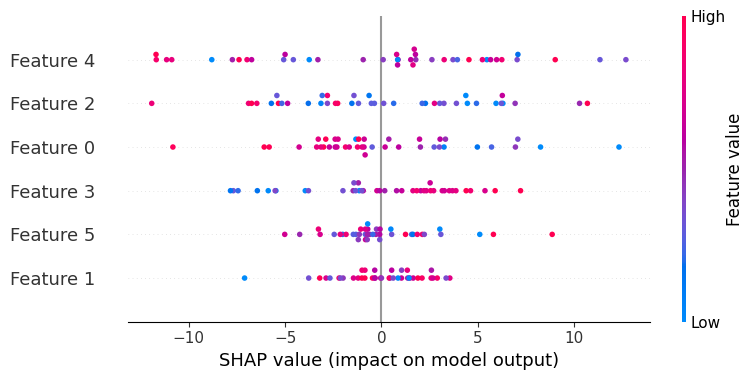



Dictionary with SHAP explainer and SHAP values returned as 'shap_dict'.


SHAP Interpretation:
SHAP returns us a SHAP value that represents the relative importance.
The features are displayed in order of importance, from the most important (top of the plot) to the less important (bottom of the plot).
A feature which is shown on the right side of the plot results in positive impact on the model, whereas a feature on the left results into a negative impact in the response.
The relative impact is shown by the color scale: a tone closer to red indicates a higher impact, whereas the proximity to blue indicates low relative impact.


In [14]:
MODEL_OBJECT = kmeans_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = xgb_model

X_TRAIN = split_dictionary['X_train']
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN

MODEL_TYPE = 'general'
# MODEL_TYPE = 'general' for the general case, including artificial neural networks.
# MODEL_TYPE = 'linear' for Sklearn linear models (OLS, Ridge, Lasso, ElasticNet,
# Logistic Regression).
# MODEL_TYPE = 'tree' for tree-based models (Random Forest and XGBoost).
# MODEL_TYPE = 'deep' for Deep Learning TensorFlow model.
# Actually, any string different from 'linear', 'tree', or 'deep' (including blank string)
# will apply the general case.

TOTAL_OF_SHAP_POINTS = 40
# TOTAL_OF_SHAP_POINTS (integer): number of points from the
# subset X_train that will be randomly selected for the SHAP
# analysis. If the kernel is taking too long, reduce this value.


# Dictionary containing calculated metrics returned as shap_dict;
# Simply modify this object on the left of equality:
shap_dict = shap_feature_analysis (model_object = MODEL_OBJECT, X_train = X_TRAIN, model_type = MODEL_TYPE, total_of_shap_points = TOTAL_OF_SHAP_POINTS)

### **Importing or exporting models and dictionaries (or lists)**

#### Case 1: import only a model

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model.
# Simply modify this object on the left of equality:
model = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 2: import only a dictionary or a list

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'dict_or_list_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Dictionary or list saved as imported_dict_or_list.
# Simply modify this object on the left of equality:
imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 3: import a model and a dictionary (or a list)

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_and_dict'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model. Dictionary or list saved as imported_dict_or_list.
# Simply modify these objects on the left of equality:
model, imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 4: export a model and/or a dictionary (or a list)

In [15]:
ACTION = 'export'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = 'kmeans_model'
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = kmeans_model
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

Scikit-learn model successfully exported as kmeans_model.pkl.
Export of files completed.


## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [16]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset3"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file"
# to export the CSV file 'my_file.csv' to notebook's workspace.

export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset3 exported as CSV file to notebook's workspace as 'dataset3.csv'.


## **Exporting dataframes as Excel file tables**

In [ ]:
## WARNING: all files exported from this function are .xlsx

FILE_NAME_WITHOUT_EXTENSION = "datasets"
# (string, in quotes): input the name of the
# file without the extension. e.g. new_file_name_without_extension = "my_file"
# will export a file 'my_file.xlsx' to notebook's workspace.

EXPORTED_TABLES = [{'dataframe_obj_to_be_exported': None,
                    'excel_sheet_name': None},]

# exported_tables is a list of dictionaries. User may declare several dictionaries,
# as long as the keys are always the same, and if the values stored in keys are not None.

# key 'dataframe_obj_to_be_exported': dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: dataframe_obj_to_be_exported = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

# key 'excel_sheet_name': string containing the name of the sheet to be written on the
# exported Excel file. Example: excel_sheet_name = 'tab_1' will save the dataframe in the
# sheet 'tab_1' from the file named as file_name_without_extension.

# examples: exported_tables = [{'dataframe_obj_to_be_exported': dataset1,
# 'excel_sheet_name': 'sheet1'},]
# will export only dataset1 as 'sheet1';
# exported_tables = [{'dataframe_obj_to_be_exported': dataset1, 'excel_sheet_name': 'sheet1'},
# {'dataframe_obj_to_be_exported': dataset2, 'excel_sheet_name': 'sheet2']
# will export dataset1 as 'sheet1' and dataset2 as 'sheet2'.

# Notice that if the file does not contain the exported sheets, they will be created. If it has,
# the sheets will be replaced.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None


export_pd_dataframe_as_excel (file_name_without_extension = FILE_NAME_WITHOUT_EXTENSION, exported_tables = EXPORTED_TABLES, file_directory_path = FILE_DIRECTORY_PATH)

****